In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#1 Import ไฟล์ vgsales เช็คข้อมูลเบื้องต้น
url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/AB_NYC_2019.csv'
df = pd.read_csv(url,parse_dates=['last_review'])
df1=df #สร้างมาไว้ใชัดัดแปลง
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,41,-74,Private room,149,1,9,2018-10-19,0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,41,-74,Entire home/apt,225,1,45,2019-05-21,0,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,41,-74,Private room,150,3,0,NaT,nan,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,41,-74,Entire home/apt,89,1,270,2019-07-05,5,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,41,-74,Entire home/apt,80,10,9,2018-11-19,0,1,0


In [0]:
#2 สุ่มอ่านข้อมูล 10 แถว หัว 5 แถว และท้าย 5 แถว
pd.concat([df1.head(5),df1.tail(5)])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [0]:
#3 หา Top 10 Neighbourhood ยอดฮิต พร้อมระบุจำนวน
df1['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [0]:
#4 หา Bottom 10 Neighbourhood ยอดฮิต พร้อมระบุจำนวน
df1['neighbourhood'].value_counts().tail(10)

Lighthouse Hill    2
Howland Hook       2
Co-op City         2
West Farms         2
Willowbrook        1
Woodrow            1
Fort Wadsworth     1
New Dorp           1
Rossville          1
Richmondtown       1
Name: neighbourhood, dtype: int64

In [0]:
#5 หา Top 10 Neighbourhood Group ยอดฮิต พร้อมระบุจำนวน และ ข้อ #6 หา Bottom 10 Neighbourhood Group ยอดฮิต พร้อมระบุจำนวน
df1['neighbourhood_group'].value_counts() #มีข้อมูลแค่ 5

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [0]:
#7 หาค่าเฉลี่ยราคาของพื้นที่ และเขต
df1[['neighbourhood','price']].groupby('neighbourhood').mean().round(2)

,price
neighbourhood,
Allerton,87.60
Arden Heights,67.25
Arrochar,115.00
Arverne,171.78
Astoria,117.19
...,...
Windsor Terrace,138.99
Woodhaven,67.17
Woodlawn,60.09


In [0]:
df1[['neighbourhood_group','price']].groupby('neighbourhood_group').mean().round(2)

,price
neighbourhood_group,
Bronx,87.50
Brooklyn,124.38
Manhattan,196.88
Queens,99.52
Staten Island,114.81


In [0]:
#8 จงหาว่าห้องประเภทใดมีราคาเฉลี่ยมากที่สุด
df1[['room_type','price']].groupby('room_type').mean().round(2)

,price
room_type,
Entire home/apt,211.79
Private room,89.78
Shared room,70.13


In [0]:
#9 จงหาว่าพื้นที่ใดมีข้อมูลพื้นที่อยู่แค่หน่วยเดียว
df2 = df1['neighbourhood'].value_counts()
df2[df2==1]

Willowbrook       1
Woodrow           1
Fort Wadsworth    1
New Dorp          1
Rossville         1
Richmondtown      1
Name: neighbourhood, dtype: int64

In [0]:
#10 จงหาว่าที่พักแบบใดมีการให้บริการมากที่สุด และมากเท่าใด
df1['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [0]:
#11 จงหาว่าพื้นที่ใดมีจำนวนรีวิวมากที่สุด และ เขตใดมีจำนวนรีวิวมากที่สุด
df1[['neighbourhood','number_of_reviews']].groupby('neighbourhood').count().sort_values('number_of_reviews')[::-1]

,number_of_reviews
neighbourhood,
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
...,...
New Dorp,1
Willowbrook,1
Fort Wadsworth,1


In [0]:
#12 จงหา Top 3 จำนวน Minimum Nights ที่มีเขตไม่ซ้ำกัน
df2=df1[['neighbourhood_group','minimum_nights']].sort_values('minimum_nights')[::-1].head(10)
df2
#df3 = df2[df2 != 'Manhattan']
#df3.dropna(axis=0)
#df2.set_index('neighbourhood_group')
#df2.drop([5767],axis=0)

,neighbourhood_group,minimum_nights
5767,Manhattan,1250
2854,Manhattan,1000
38664,Manhattan,999
26341,Brooklyn,999
13404,Manhattan,999
11193,Brooklyn,500
47620,Brooklyn,500
8014,Manhattan,500
14285,Brooklyn,500
7355,Queens,500


In [0]:
#13 จงหาชื่อ Host ที่ลิสที่อยู่มากที่สุด 10 อันดับแรก (Hint: ใช้ชื่อไม่ได้)
df1['host_id'].value_counts().head(10) #ชื่อซ้ำกันได้แต่ไม่ใช่คนเดียวกัน ใช้เลข id จำแนก 

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [0]:
#14 จงหาชื่อ Host ที่มีชื่อซ้ำกันมากที่สุด 10 ชื่อ (โดยที่ไม่ใช้คนเดียวกัน)
df1['host_name'].value_counts().head(10) 

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

In [0]:
#15 จงหาชื่อ Host ที่มีรีวิวมากที่สุด 10 อันดับแรก
df2 = df1[['host_id','host_name','number_of_reviews']].sort_values('number_of_reviews')[::-1].head(20)
df2

,host_id,host_name,number_of_reviews
11759,47621202,Dona,629
2031,4734398,Jj,607
2030,4734398,Jj,597
2015,4734398,Jj,594
13495,47621202,Dona,576
10623,37312959,Maya,543
1879,2369681,Carol,540
20403,26432133,Danielle,510
4870,12949460,Asa,488
471,792159,Wanda,480


In [0]:
#16 จงหาชื่อ Host ที่มีการลิสที่อยู่ที่มีราคาเฉลี่ยสูงที่สุด 10 อันดับแรก
df[['host_id','host_name','price']].sort_values('price')[::-1].head(10)

,host_id,host_name,price
29238,72390391,Jelena,10000
9151,20582832,Kathrine,10000
17692,5143901,Erin,10000
12342,3906464,Amy,9999
40433,4382127,Matt,9999
6530,1235070,Olson,9999
30268,18128455,Rum,8500
4377,1177497,Jessica,8000
29662,156158778,Sally,7703
42523,7407743,Jack,7500


In [0]:
#17 จงเพิ่ม 2 คอลัมน์ชื่อ Year และ Month จาก last review ต่อท้าย โดยใช้ข้อมูลจากคอลัมน์ last_review (Hint: ใช้ lambda)
df1['Year']=df1['last_review'].dt.year
df1['Month']=df1['last_review'].dt.month
df1['Day']=df1['last_review'].dt.day
for i in df1['Year']:
  if i != 'NaT':
    pd.options.display.float_format = '{:.0f}'.format
df1.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,Month,Day
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,41,-74,Private room,149,1,9,2018-10-19,0,6,365,2018,10,19
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,41,-74,Entire home/apt,225,1,45,2019-05-21,0,2,355,2019,5,21
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,41,-74,Private room,150,3,0,NaT,nan,1,365,nan,nan,nan
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,41,-74,Entire home/apt,89,1,270,2019-07-05,5,1,194,2019,7,5
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,41,-74,Entire home/apt,80,10,9,2018-11-19,0,1,0,2018,11,19


In [0]:
#18 สร้างคอลัมน์ใหม่ โดยให้บรรจุ Day-of-the-week (Mon, Tue....) โดยใช้ข้อมูลจาก last_review (Hint: ใช้ datetime กับ map มาช่วย)
#กำหนดให้ 0 = Mon, 1= Tue, 2 = Wed, 3 = Thu, 4 = Fri, 5 = Sat, 6 = Sun
df1['Day-of-the-week']=df1['last_review'].dt.day_name()
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,Month,Day,Day-of-the-week
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,41,-74,Private room,149,1,9,2018-10-19,0,6,365,2018,10,19,Friday
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,41,-74,Entire home/apt,225,1,45,2019-05-21,0,2,355,2019,5,21,Tuesday
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,41,-74,Private room,150,3,0,NaT,nan,1,365,nan,nan,nan,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,41,-74,Entire home/apt,89,1,270,2019-07-05,5,1,194,2019,7,5,Friday
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,41,-74,Entire home/apt,80,10,9,2018-11-19,0,1,0,2018,11,19,Monday


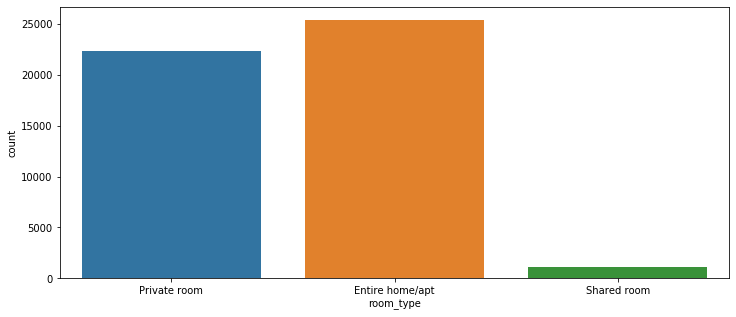

In [0]:
#19 สร้าง Count Plot นับข้อมูลประเภทของที่อยู่อาศัย
plt.figure(figsize=(12,5))
#df1 = df1['room_type'].value_counts()
sns.countplot(data=df,x=df['room_type'])

([<matplotlib.patches.Wedge at 0x7fa4d64697f0>,
 [Text(0.19589098201007543, 1.0824170744990715, 'Manhattan'),
  Text(-0.65440050417929, -0.8841719177455769, 'Brooklyn'),
  Text(0.9365212904925617, -0.5769990229230436, 'Queens'),
  Text(1.0923467232360349, -0.1295323752407009, 'Bronx'),
  Text(1.0996841146061016, -0.026359971225222757, 'Staten Island')])

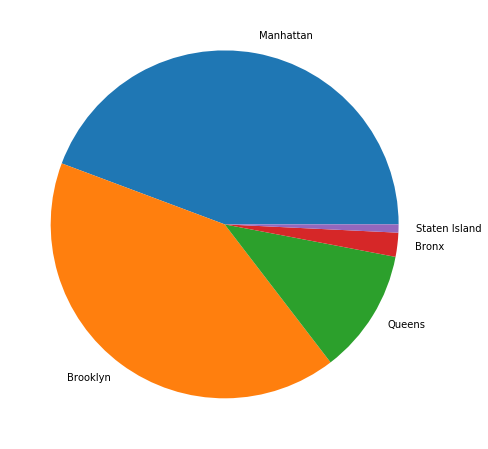

In [0]:
#20 สร้าง Pie Chart หาพื้นที่ ที่มีที่อยู่อาศัยเยอะที่สุด 5 อันดับแรก
df2 = df['neighbourhood_group'].value_counts().head(5)
#df1
labels = df2.index
plt.figure(figsize=(8,8))
plt.pie(df2.values,labels=labels)

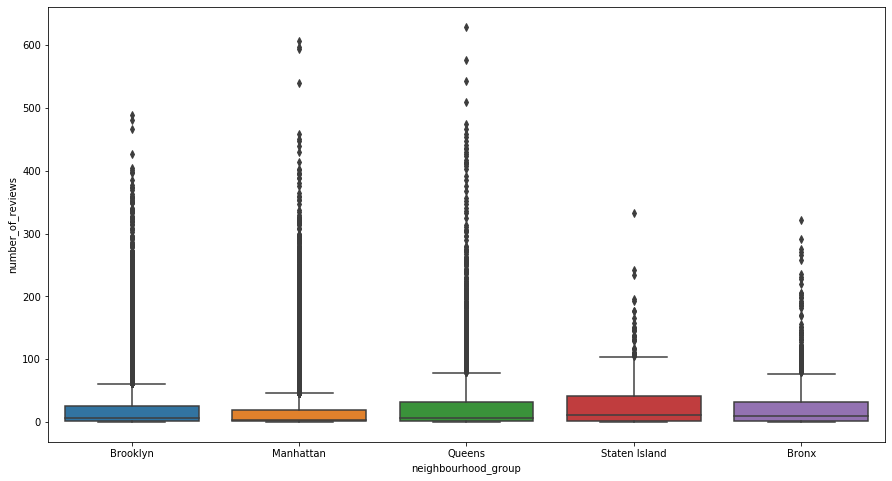

In [0]:
#21 สร้าง Box Plot โดยให้แกน X เป็น เขต และ Y เป็นจำนวนรีวิว
plt.figure(figsize=(15,8))
sns.boxplot(x='neighbourhood_group',y='number_of_reviews',data=df)

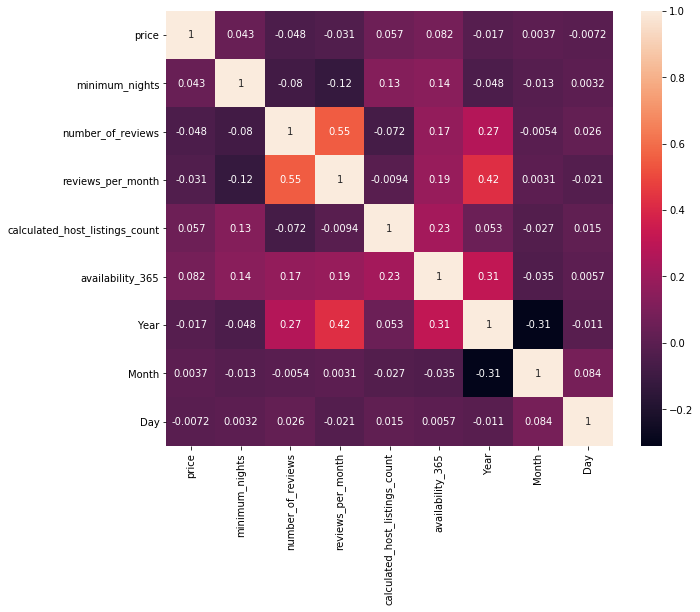

In [0]:
#22 สร้าง HeatMap จาก Correlation ของ DataFrame และพิจารณาดูความสัมพันธ์ พร้อมกับนำความสัมพันธ์ที่เป็น Strongest Positive มาทำ ScatterPlot
df3 = df.drop(['name','id','host_id','host_name','latitude','longitude'],axis=1).corr() #ตัดหมายเลขบัตรตั๋วเดินทางออก

plt.figure(figsize=(10,8))
sns.heatmap(df3,annot=True)

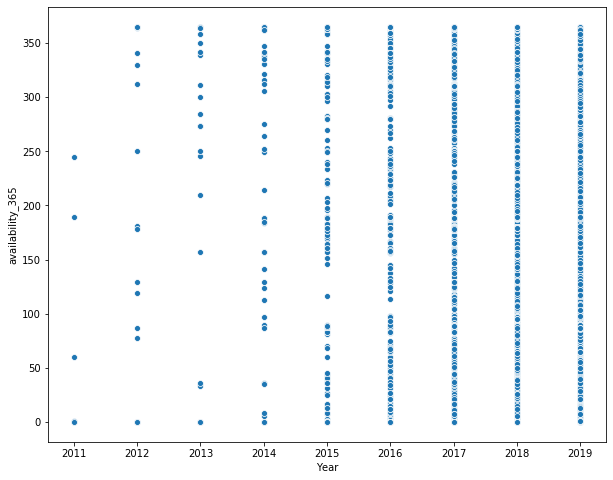

In [0]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Year',y='availability_365',data=df)

In [0]:
#23 สร้าง Count plot หาจำนวน Last review ของแต่ละเดือนของปี 2018
df1['Year']=df1['last_review'].dt.year
df1['Month']=df1['last_review'].dt.month
df1['Day']=df1['last_review'].dt.day
for i in df1['Year']:
  if i != 'NaT':
    pd.options.display.float_format = '{:.0f}'.format
df1['Day-of-the-week']=df1['last_review'].dt.day_name()
df4 = df1[df1[['Year','Month']]['Year']==2019]
df4.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,Month,Day,Day-of-the-week
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,41,-74,Entire home/apt,225,1,45,2019-05-21,0,2,355,2019,5,21,Tuesday
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,41,-74,Entire home/apt,89,1,270,2019-07-05,5,1,194,2019,7,5,Friday
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,41,-74,Entire home/apt,200,3,74,2019-06-22,1,1,129,2019,6,22,Saturday
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,41,-74,Private room,79,2,430,2019-06-24,3,1,220,2019,6,24,Monday
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,41,-74,Entire home/apt,150,1,160,2019-06-09,1,4,188,2019,6,9,Sunday


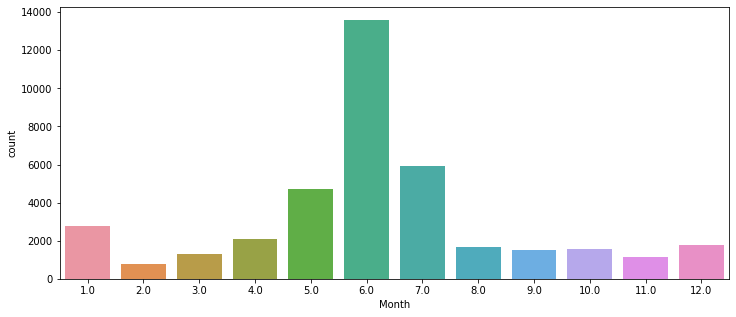

In [0]:
plt.figure(figsize=(12,5))
#df1 = df1['room_type'].value_counts()
sns.countplot(data=df4,x=df['Month'])

([<matplotlib.patches.Wedge at 0x7fa4d0964cc0>,
 [Text(0.7982215259125184, 0.7568635250624058, 'Sunday'),
  Text(-0.5535147249472275, 0.9505900532125271, 'Monday'),
  Text(-1.0998488046878594, 0.018237511526711693, 'Saturday'),
  Text(-0.7559269690410939, -0.7991085142058901, 'Tuesday'),
  Text(-0.013567252140063974, -1.0999163284856572, 'Friday'),
  Text(0.6854908635257219, -0.860291971381089, 'Wednesday'),
  Text(1.054868510792704, -0.3118532105622502, 'Thursday')])

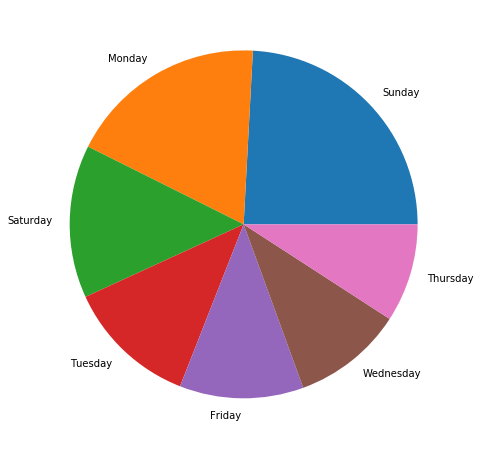

In [0]:
#24 สร้าง Pie Chart หาอัตราส่วน Last Review ในแต่ละวัน
df1=df
df1['Year']=df1['last_review'].dt.year
df1['Month']=df1['last_review'].dt.month
df1['Day']=df1['last_review'].dt.day
for i in df1['Year']:
  if i != 'NaT':
    pd.options.display.float_format = '{:.0f}'.format
df1['Day-of-the-week']=df1['last_review'].dt.day_name()

df2 = df1['Day-of-the-week'].value_counts()
df2.astype(float)
df2/df2.sum()

plt.figure(figsize=(8,8))
labels = df2.index
plt.pie(df2.values,labels=labels)

In [0]:
#25 สร้าง Line Graph หาราคาเฉลี่ยในแต่ละเดือนของ Last Review ในปี 2019
df1['Year']=df1['last_review'].dt.year
df1['Month']=df1['last_review'].dt.month
df1['Day']=df1['last_review'].dt.day
for i in df1['Year']:
  if i != 'NaT':
    pd.options.display.float_format = '{:.0f}'.format
df1['Day-of-the-week']=df1['last_review'].dt.day_name()
df2 = df1.groupby('Month')['price'].mean()
df2

Month
1    150
2    156
3    137
4    140
5    138
6    141
7    142
8    132
9    149
10   142
11   139
12   161
Name: price, dtype: float64

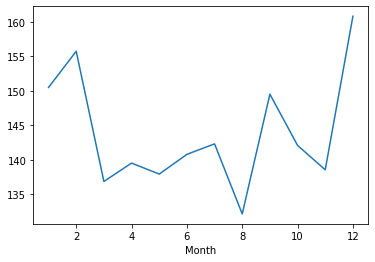

In [0]:
sns.lineplot(x=df2.index,y=df2.values)

In [0]:
#26 สร้าง Column ใหม่ โดยคำนวณ ณ เวลาปัจจุบันถึงวันที่ Last Review ห่างกันกี่วัน (Hint: ใช้ datetime ปัจจุบัน - datetime last review)
df2 = df
df2['now']=pd.datetime.now()-df2['last_review']
df2['now']=df2['now'].dt.days

df2.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,Month,Day,Day-of-the-week,today,now
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,41,-74,Private room,149,1,9,2018-10-19,0,6,365,2018,10,19,Friday,2018-10-19,493
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,41,-74,Entire home/apt,225,1,45,2019-05-21,0,2,355,2019,5,21,Tuesday,2019-05-21,279
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,41,-74,Private room,150,3,0,NaT,nan,1,365,nan,nan,nan,NaN,NaT,nan


([<matplotlib.patches.Wedge at 0x7fa4cff5f198>,
 [Text(0.9499980716804539, 0.5545301288509213, 'Bronx'),
  Text(-0.25989678547802453, 1.068856239584253, 'Brooklyn'),
  Text(-1.0774122388877445, -0.22177210711651255, 'Manhattan'),
  Text(0.0184176150406026, -1.0998458034907515, 'Queens'),
  Text(0.9776711759794025, -0.504141916189333, 'Staten Island')])

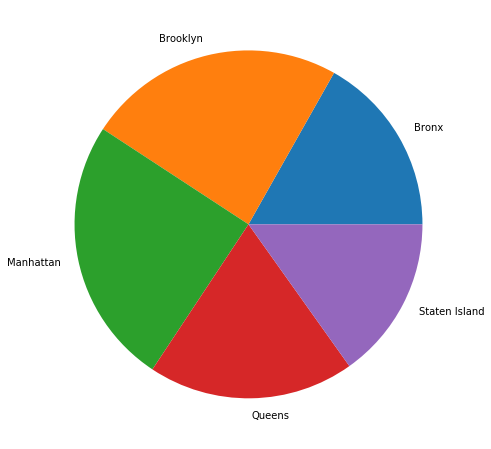

In [0]:
#27 สร้าง Pie Chart ของระยะห่างของเวลา ระหว่างปัจจุบันถึง Last review เฉลี่ย ของแต่ละเขต (หน่วยเป็นวัน)
df3 = df2.groupby('neighbourhood_group')['now'].mean()
#df3
plt.figure(figsize=(8,8))
labels = df3.index
plt.pie(df3.values,labels=labels)

In [0]:
#28 สร้าง Bar Plot ของระยะห่างของเวลา ระหว่างปัจจุบันถึง Last review เฉลี่ย ของแต่ละพื้นที่ 10 พื้นที่แรกที่มีระยะเวลามากที่สุด (หน่วยเป็นวัน)
df2 = df
df2['now']=pd.datetime.now()-df2['last_review']
df2['now']=df2['now'].dt.days

df2.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,Month,Day,Day-of-the-week,today,now
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,41,-74,Private room,149,1,9,2018-10-19,0,6,365,2018,10,19,Friday,2018-10-19,493
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,41,-74,Entire home/apt,225,1,45,2019-05-21,0,2,355,2019,5,21,Tuesday,2019-05-21,279
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,41,-74,Private room,150,3,0,NaT,nan,1,365,nan,nan,nan,NaN,NaT,nan


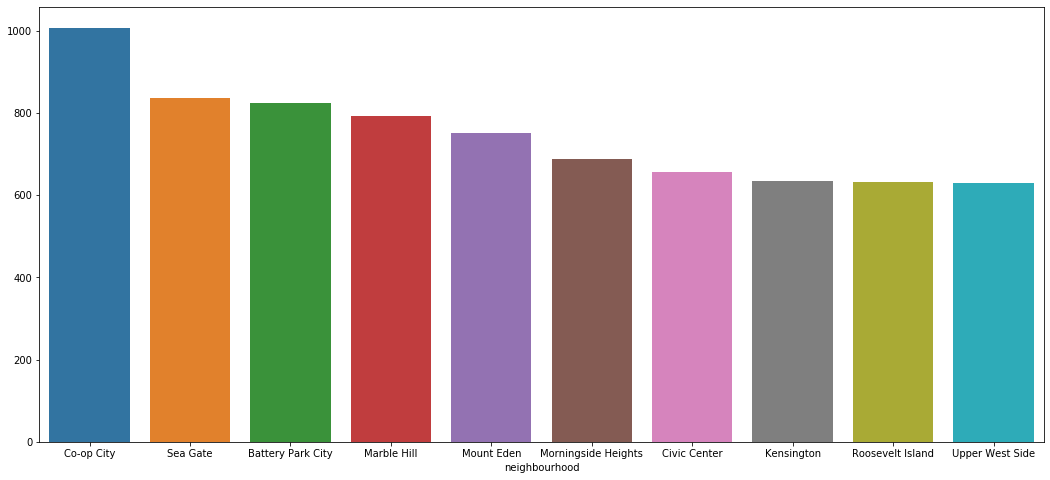

In [0]:
df3 = df2.groupby('neighbourhood')['now'].mean().sort_values()[::-1]
df4 = df3.dropna().head(10)

plt.figure(figsize=(18,8))
sns.barplot(y=df4.values,x=df4.index)

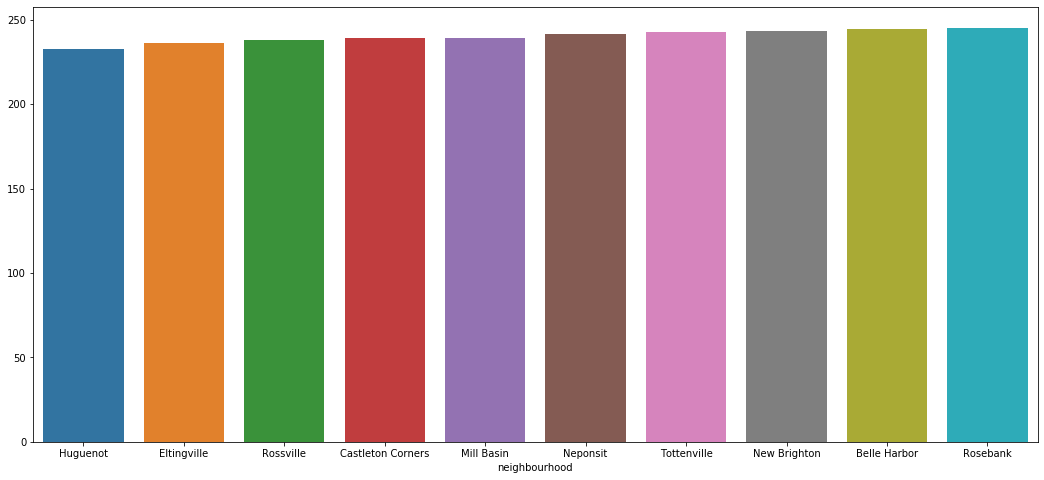

In [0]:
#29 สร้าง Bar Plot ของค่าเฉลี่ยระยะเวลาห่างระหว่างปัจจุบันถึง Last review เฉลี่ย ของแต่ละพื้นที่ 10 พื้นที่แรกที่มีระยะเวลาน้อยที่สุด
df3 = df2.groupby('neighbourhood')['now'].mean().sort_values()
df4 = df3.dropna().head(10)
df4
plt.figure(figsize=(18,8))
sns.barplot(y=df4.values,x=df4.index)

In [0]:
#30 สร้าง Scatter Plot หาความสัมพันธ์ระหว่าง ระยะเวลาห่างระหว่างปัจจุบันถึง Last review กับ Minimum Nights (Hint: Correlation)
df3 = df2.groupby('minimum_nights')['now'].mean().sort_values()
df4 = df3.dropna().head(10)
#df4
df4 = df2


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,Month,Day,Day-of-the-week,today,now
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,41,-74,Private room,149,1,9,2018-10-19,0,6,365,2018,10,19,Friday,2018-10-19,493
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,41,-74,Entire home/apt,225,1,45,2019-05-21,0,2,355,2019,5,21,Tuesday,2019-05-21,279
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,41,-74,Private room,150,3,0,NaT,nan,1,365,nan,nan,nan,NaN,NaT,nan


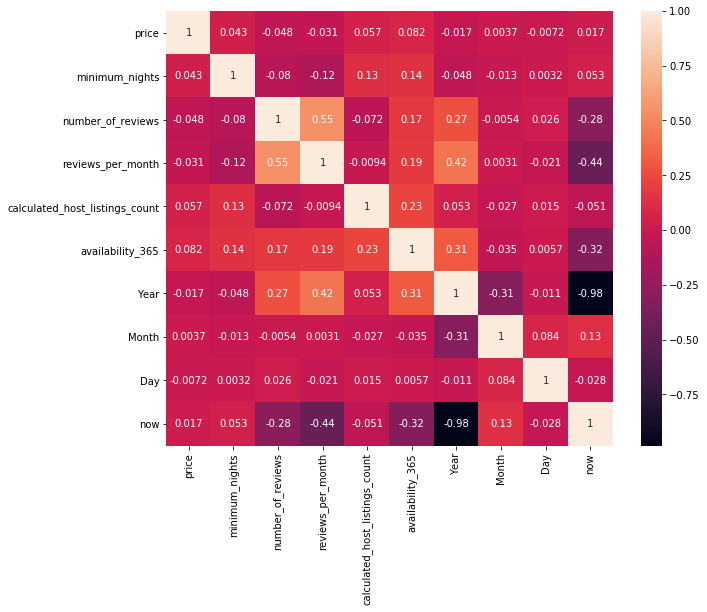

In [0]:
df5 = df4.drop(['name','id','host_id','host_name','latitude','longitude'],axis=1).corr() #ตัดหมายเลขบัตรตั๋วเดินทางออก

plt.figure(figsize=(10,8))
sns.heatmap(df5,annot=True)

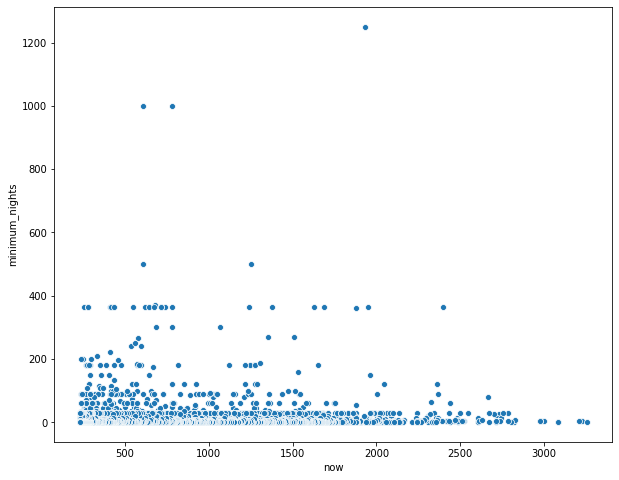

In [0]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='now',y='minimum_nights',data=df4)